In [2]:
import pandas as pd
import itertools

def generate_number_plates(prefix, alpha_len, digit_len):
    alpha1 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    digit1 = '0123456789'

    alpha_comb= itertools.product(alpha1, repeat=alpha_len)
    digit_comb= itertools.product(digit1, repeat=digit_len)

    number_plates = [prefix + ''.join(alpha) + ''.join(digit) for alpha, digit in itertools.product(alpha_comb, digit_comb) if ''.join(digit) != '0000']

    return number_plates

# Example: Generate all combinations for TS08 followed by 2 alphabets and 4 digits
prefix = 'TS08'
alpha_len= 2
digit_len= 4
number_plates = generate_number_plates(prefix, alpha_len, digit_len)

# Company and Models data
company = ['Toyota', 'Honda', 'Nissan', 'Hyundai', 'Tata', 'MG', 'Kia', 'Mahindra', 'Maruti Suzuki', 'Skoda']
models = {
    'Toyota': ['Innova', 'Fortuner', 'Camry', 'Corolla', 'Land cruiser', 'Vellfire'],
    'Honda': ['Amaze', 'Civic', 'Accord', 'Honda City', 'Odyssey', 'Unicorn', 'Ridgeline', 'Pilot'],
    'Nissan': ['KICKS', 'Juke', 'Qashqai', 'Terrano', 'Altima', 'Leaf', 'Pathfinder', 'Rogue', 'Titan'],
    'Hyundai': ['Creta', 'I20', 'I10', 'Tucson', 'Verna', 'Aura', 'Alcazar', 'Nexo', 'Santro', 'Elantra', 'Santa Fe'],
    'Tata': ['Nexon', 'Punch', 'Harrier', 'Safari', 'Tiago', 'Altroz', 'Nano'],
    'MG': ['Gloster', 'Hector', 'Comet EV', 'Astor', 'Hector Plus', 'ZS EV'],
    'Kia': ['Sonet', 'Seltos', 'EV 6', 'Carens'],
    'Mahindra': ['Thar', 'Scorpio', 'XUV700', 'Bolero', 'Bolero Neo', 'XUV300', 'XUV400'],
    'Maruti Suzuki': ['Fronx', 'Grand Vitara', 'Brezza', 'Swift', 'Baleno', 'Ertiga', 'WagonR', 'Alto', 'Dzire'],
    'Skoda': ['Slavia', 'Kushaq', 'Kodiaq', 'Superb', 'Enyaq']
}

# Create a list to store car data
cars = []

# Populate the list with data
import random
for plate, comp in zip(number_plates, itertools.cycle(company)):
    model = random.choice(models[comp] ) # Assuming the first model in the list for simplicity
    color = random.choice(['black','white','blue','lightsteelblue'])  # You can specify the color or leave it as 'Unknown'
    cars.append({'number_plate': plate, 'company': comp, 'model': model, 'color': color})

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(cars)

# Print the DataFrame
df

,number_plate,company,model,color
0,TS08AA0001,Toyota,Corolla,white
1,TS08AA0002,Honda,Unicorn,white
2,TS08AA0003,Nissan,Qashqai,blue
3,TS08AA0004,Hyundai,Nexo,blue
4,TS08AA0005,Tata,Nexon,white
...,...,...,...,...
6759319,TS08ZZ9995,Skoda,Kodiaq,lightsteelblue
6759320,TS08ZZ9996,Toyota,Innova,white
6759321,TS08ZZ9997,Honda,Ridgeline,lightsteelblue
6759322,TS08ZZ9998,Nissan,Qashqai,blue


In [4]:
df.dtypes

number_plate    object
company         object
model           object
color           object
dtype: object

In [5]:
df.columns

Index(['number_plate', 'company', 'model', 'color'], dtype='object')

In [6]:
df.shape

(6759324, 4)

In [7]:
df.nunique()

number_plate    6759324
company              10
model                72
color                 4
dtype: int64

In [8]:
df.describe()

,number_plate,company,model,color
count,6759324,6759324,6759324,6759324
unique,6759324,10,72,4
top,TS08AA0001,Toyota,Carens,white
freq,1,675933,169166,1691428


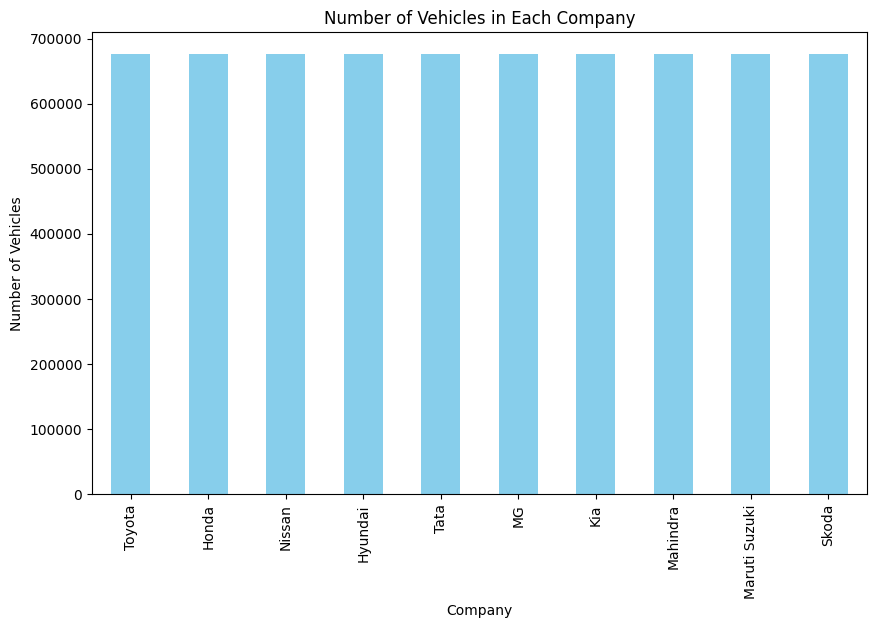

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
company_counts = df['company'].value_counts()
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles in Each Company')
plt.show()



<ipython-input-8-59a4451ff409>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


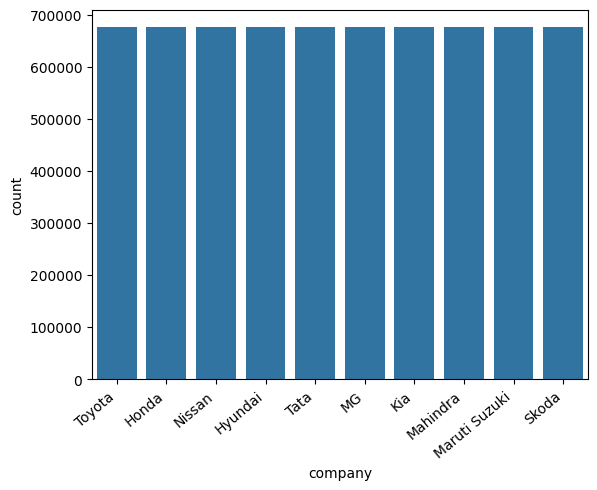

In [8]:
import seaborn as sns
ax=sns.countplot(x='company',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


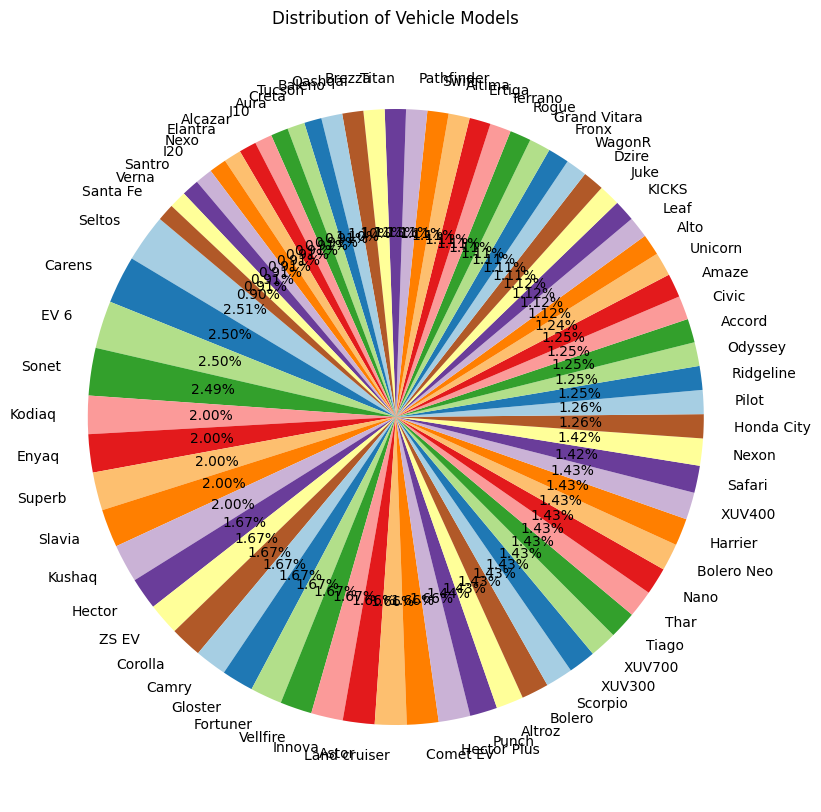

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
model_counts = df['model'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Vehicle Models')
plt.show()


In [15]:
import cv2
import numpy as np
import webcolors

def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_car_color(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image_rgb.reshape((-1, 3))

    # Convert the data type to float32
    pixels = np.float32(pixels)

    # Define the criteria for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Number of clusters (colors)
    k = 3

    # Apply k-means clustering
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to integers
    centers = np.uint8(centers)

    # Find the dominant color
    dominant_color = tuple(centers[np.argmax(np.unique(labels, return_counts=True)[1])])

    # Get the closest color name using webcolors
    color_name = closest_color(dominant_color)

    return color_name

# Example usage
image_path = "/content/WhatsApp Image 2023-12-23 at 11.00.02 AM.jpeg"
dominant_color_name = get_car_color(image_path)
print(f"The dominant color of the car is: {dominant_color_name}")


The dominant color of the car is: lightsteelblue


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!cp -r /content/drive/MyDrive/Test /content/

In [19]:
!cp -r /content/drive/MyDrive/Train /content/

In [20]:
directory = "Train"
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['skoda', 'hyundai', 'volkswagen', 'toyota', '.DS_Store']
5


In [21]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 1001 images belonging to 4 classes.
Found 248 images belonging to 4 classes.


In [23]:
brand_map=[]

In [24]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=valid_generator,batch_size= 128,epochs=80)

Epoch 1/80
32/32 [==============================] - 35s 980ms/step - loss: 1.3905 - accuracy: 0.2358 - val_loss: 1.3860 - val_accuracy: 0.2661
Epoch 2/80
32/32 [==============================] - 31s 956ms/step - loss: 1.3874 - accuracy: 0.2488 - val_loss: 1.3857 - val_accuracy: 0.2621
Epoch 3/80
32/32 [==============================] - 31s 955ms/step - loss: 1.3800 - accuracy: 0.2408 - val_loss: 1.3497 - val_accuracy: 0.3589
Epoch 4/80
32/32 [==============================] - 31s 955ms/step - loss: 1.3453 - accuracy: 0.3187 - val_loss: 1.3405 - val_accuracy: 0.3185
Epoch 5/80
32/32 [==============================] - 31s 956ms/step - loss: 1.2978 - accuracy: 0.3636 - val_loss: 1.2789 - val_accuracy: 0.3831
Epoch 6/80
32/32 [==============================] - 30s 919ms/step - loss: 1.2262 - accuracy: 0.3796 - val_loss: 1.1902 - val_accuracy: 0.3790
Epoch 7/80
32/32 [==============================] - 29s 910ms/step - loss: 1.1878 - accuracy: 0.4026 - val_loss: 1.1710 - val_accuracy: 0.3992

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

training_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
plt.plot(training_accuracy, 'r', label = 'training loss')
plt.plot(validation_accuracy, 'b', label = 'validation loss')
plt.title('training and test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
load_img("/content/WhatsApp Image 2023-12-22 at 8.25.43 PM.jpeg",target_size=(180,180))

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
image=load_img("/content/WhatsApp Image 2023-12-22 at 8.25.43 PM.jpeg",target_size=(100,100))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

In [ ]:
import torch

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
img=cv2.imread("/content/WhatsApp Image 2023-12-22 at 8.25.43 PM.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
       location = approx
       break

In [ ]:
location

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)


In [ ]:
print(result)

In [ ]:
orry=result[0][-2]+result[1][-2]
str= orry.replace(" ", "")
print(str)


IndexError: ignored

In [ ]:
entered_company = 'Honda'
entered_model = 'Civic'
entered_colour=dominant_color_name
known_digits = result

filtered_df = df[(df['company'] == entered_company) & (df['model'] == entered_model) & (df['color']==  entered_colour)]


print("Filtered DataFrame:")
print(filtered_df)


for index, row in filtered_df.iterrows():
    full_number_plate = row['number_plate']
    if full_number_plate.startswith(known_digits):
        print(f"Complete Number Plate: {full_number_plate}")
        break
else:
    print("No matching complete number plate found.")